(7)=
# Chapter 7: Image Processing & Analysis

In [1]:
%config InlineBackend.figure_format = 'svg'

Images are a major data format in chemistry and other sciences. They can be electron microscope images of a surface, photos of a reaction, or images from fluorescence microscopy. Image processing and analysis can be performed using software like Photoshop or [GIMP](https://www.gimp.org/), but this can be tedious and subjective when done manually. A better alternative is to have software automate the entire process to provide consistent, precise, and objective processing of images and taking measurements of their features.

Among the more popular Python library for performing scientific image analysis is scikit-image. This is a library specifically designed for scientific image analysis and includes a wide variety of tools for the processing and extracting information from images. Examples of tools in scikit-image include functions for boundary detection, object counting, entropy quantification, color space conversion, image comparison, and many others. Even though there are other Python libraries for working with images, such as [pillow](https://pillow.readthedocs.io/en/4.2.x/), scikit-image is designed for scientific image analysis while pillow is intended for more fundamental operations such as image rotation and cropping.

```{index} scikit-image
```
    
Like SciPy, scikit-image stores most of its functions in modules, so it is common to import modules individually. For example, if the user wants to import the `color` module, it is imported using the following code.

~~~python
from skimage import color
~~~

Multiple modules can also be imported in a single import such as below. A list of modules and their description are shown in Table 1, and additional information can be found on the project website at [http://scikit-image.org/](http://scikit-image.org/).

~~~python
from skimage import color, data, io
~~~

We can also import a single function from a module using the following code structure.

~~~python
from skimage.module import function
~~~

**Table 1** Scikit-Image Modules

| Module | Description |
|:-----: | :--------   |
|`color` | Converts images between color spaces |
|`data` | Provides sample images|
|`draw`| Generates coordinates of geometric shapes|
|`exposure` | Examines and modifies image exposure levels|
|`external.tifffile` | Handles reading, writing, and visualizing TIFF files|
|`feature` | Feature detection and calculation|
|`filters` | Contains various image filters and functions for calculating threshold values|
|`filters.rank` | Returns localized measurements in the image.|
|`graph` | Finds optimized paths across the image|
|`io` | Supports reading and writing images and contains a function for displaying images|
|`measure` | Performs a variety of measurements and calculations on or between two images|
|`morphology` | Generates objects of a specified morphology|
|`novice` | Provides simple image functions for beginners|
|`restoration` | Includes image restoration tools|
|`segmentation` | Identifies boundaries in an image|
|`transform` | Performs image transformations including scaling and image rotation|
|`util` | Converts images into different encodings (e.g., floats to integers) and other modifications such as inverting the image values and adding random noise to an image|
|`viewer` | Image viewer tools|

This chapter assumes the following imports. Because we will be doing some plotting, this includes the following matplotlib import and that inline plotting is enabled. In addition, there are functions inside scikit-image that are not in a module, so we also need to `import skimage` as well.

In [2]:
import matplotlib.pyplot as plt

import skimage
from skimage import data, io, color

Despite the power and utility of the scikit-image library, there is a significant amount of image processing and analysis that can be performed using NumPy functionality. This is especially true being that scikit-image imports/stores images as NumPy arrays.

```{index} single: images; grayscale
```
(7.1)=
## 7.1 Basic Image Structure

Most images are *raster* images, which are essentially a grid of pixels where each location on the grid is a number describing that pixel. If the image is a grayscale image, these values represent how light or dark each pixel is; and if it is a color image, the value(s) at each location describe the color. Figure 1 shows a grayscale photo of a flask containing crystals, with a 10 $\times$ 10 pixel excerpt showing the brightness values from the photo. While there is another major class of images known as *vector* images, we will restrict ourselves to dealing with raster images in this chapter as primary scientific data tend to be raster images.
    
![](img/image_data_graphic.png)

**Figure 1** An excerpts of values from a grayscale image showing values representing the brightness of each pixel.

(7.1.1)=
### 7.1.1 Loading Images

```{index} single: images; loading
```

The scikit-image library includes a `data` module containing a series of images for the user to experiment with. To display images in the notebook, use the `io.imshow()` function from the `io` module. Each image in the `data` module has a function for fetching the image, and you can find a complete list of images/functions in the `data` module by typing `help(data)`. We will open and view the image of a lunar surface using the `data.moon()` function.

/var/folders/zy/7y6kpdbx6p1ffrp1vtxy3ttc0000gn/T/ipykernel_1698/786239732.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(moon);


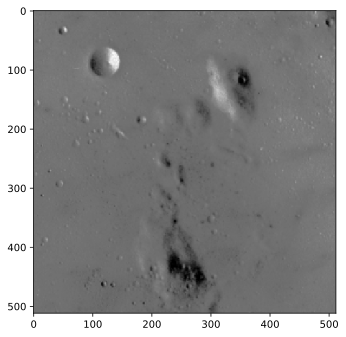

In [3]:
moon = data.moon()
io.imshow(moon);

If we take a closer look at the data contained inside the lunar surface image, we find a two-dimensional NumPy array filled with integers ranging from 0 $\rightarrow$ 255. 

In [4]:
moon

array([[116, 116, 122, ...,  93,  96,  96],
       [116, 116, 122, ...,  93,  96,  96],
       [116, 116, 122, ...,  93,  96,  96],
       ...,
       [109, 109, 112, ..., 117, 116, 116],
       [114, 114, 113, ..., 118, 118, 118],
       [114, 114, 113, ..., 118, 118, 118]], shape=(512, 512), dtype=uint8)

Each of these values represents a lightness value where 0 is black, 255 is pure white, and all other values are various shades of gray. To manipulate the image, we can use NumPy methods being that scikit-image stores images as ndarrays. For example, the image can be darkened by dividing all the values by two. Because this array is designated to contain integers (`dtype = uint8`), integer division (`//`) is used to avoid floats.

/var/folders/zy/7y6kpdbx6p1ffrp1vtxy3ttc0000gn/T/ipykernel_1698/4184250868.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(moon_dark);


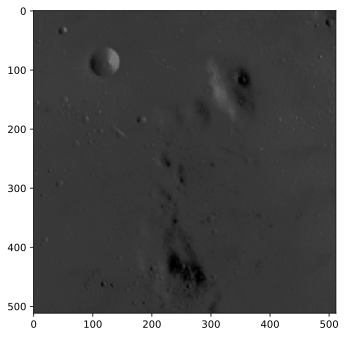

In [5]:
moon_dark = moon // 2
io.imshow(moon_dark);

```{index} single: images; color
```
(7.1.2)=
### 7.1.2 Color Images

Color images are slightly more complicated to represent because all colors cannot be represented by single integers from 0 $\rightarrow$ 255. Probably the most popular way to digitally encode colors is *RGB* which describes every color as a combination of red, green, and blue (Figure 2). These are also known as *color channels*, and this is typically how computer monitors display colors. If you look close enough at the screen, which may require a magnifying glass for high resolution displays, you can see that every pixel is really made up of three lights: a red, a green, and a blue. Their perceived color is a mixture or blend of the red, green, and blue values. Being that every pixel now has three values to describe it, a NumPy array that defines a color image is three dimensional. The first two dimensions are the height and width of the image, and the third dimension contains values from each of the three color channels. 

![](img/image_data_graphic_color.png)

**Figure 2** An excerpts of the red, green, and blue color channels for a small portion of a color image. The values in each channel represent the brightness of that color in each pixel.

By [scikit-image convention](https://scikit-image.org/docs/stable/user_guide/numpy_images.html#coordinate-conventions), the encoding of color images in arrays is shown below, and the colors are in the order red, green, and then blue.

`[row, column, channel]`

We can look at an example of a color photo by loading an image from the Hubble space telescope. This image is included with the scikit-image library for users to experiment with.

/var/folders/zy/7y6kpdbx6p1ffrp1vtxy3ttc0000gn/T/ipykernel_1698/1071723200.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(hubble);


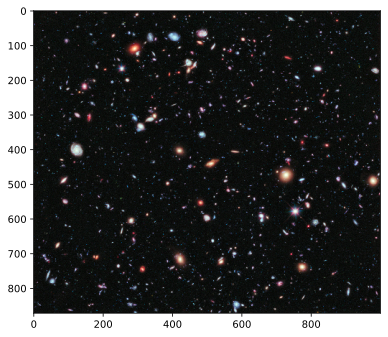

In [6]:
hubble = data.hubble_deep_field()
io.imshow(hubble);

In [7]:
hubble

array([[[15,  7,  4],
        [15,  9,  9],
        [ 9,  4,  8],
        ...,
        [18, 11,  5],
        [16, 19, 10],
        [15, 10,  6]],

       [[ 2,  7,  0],
        [ 5, 11,  7],
        [13, 19, 17],
        ...,
        [11, 10,  5],
        [13, 18, 11],
        [ 9, 11,  6]],

       [[10, 15,  9],
        [13, 18, 14],
        [18, 22, 23],
        ...,
        [ 1,  2,  0],
        [14, 15, 10],
        [ 8, 14, 10]],

       ...,

       [[19, 20, 14],
        [15, 15, 13],
        [13, 13, 13],
        ...,
        [ 2,  6,  5],
        [12, 14, 13],
        [ 7,  9,  8]],

       [[13, 10,  5],
        [ 9, 11,  8],
        [12, 18, 16],
        ...,
        [ 5,  9,  8],
        [ 6, 12, 10],
        [ 7, 13,  9]],

       [[21, 16, 12],
        [10, 12,  9],
        [ 9, 20, 16],
        ...,
        [11, 15, 14],
        [ 9, 18, 15],
        [ 7, 18, 12]]], shape=(872, 1000, 3), dtype=uint8)

Looking at the array, you will notice that it is indeed three-dimensional with values residing in triplets. You may also notice that the numbers are rather small because most pixels in this particular image are near black. If we want to look at just the red values of the image, this can be accomplish by slicing the array.  The red is the first layer in the third dimension, so we should slice it `hubble[:, :, 0]`. The brighter a group of pixels in the red channel image, the more red color that is present in that region.

/var/folders/zy/7y6kpdbx6p1ffrp1vtxy3ttc0000gn/T/ipykernel_1698/3815783581.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(hubble[:,:,0]);


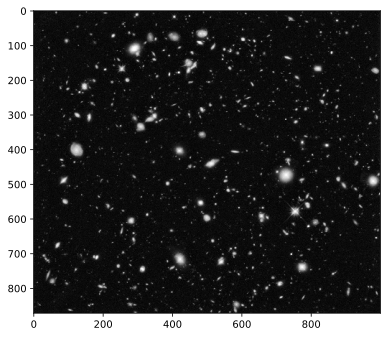

In [8]:
io.imshow(hubble[:,:,0]);

(7.1.3)=
### 7.1.3 External Images

Alternatively, images can be loaded from an external source using the `io.imread()` function provided by scikit-image. This function requires one argument to tell scikit-image which image the user wants to load. If your Jupyter notebook is in the same directory as the image you want to load, you can simply input the full file name, including the extension, as a string. Otherwise, you will need to include the full path to the file in addition to the name. Below an image showing a flask full of [Ni(CH$_3$CN)$_6$][BF$_4$]$_2$ crystals is read into Python.

/var/folders/zy/7y6kpdbx6p1ffrp1vtxy3ttc0000gn/T/ipykernel_1698/985208856.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(flask);


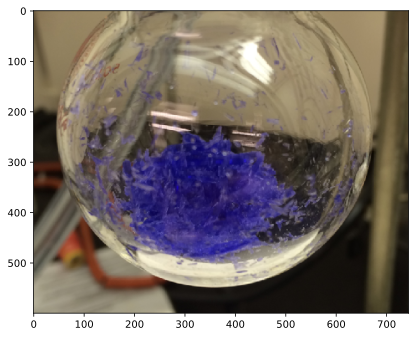

In [9]:
flask = io.imread('data/flask.png')
io.imshow(flask);

If we look at the array for the flask image below, you will notice that this is a three-dimensional array with four color channels. This can happen in some file types such as Portable Network Graphics (PNG) where a fourth *alpha color channel* is supported making the coding RGBA. This channel measures opacity... that is, how non-transparent a pixel is. All of the pixels in this image are fully opaque which is represented by all `255`. If the image was fully transparent, the third values would be all zeros, and anything in between would be translucent. PNG images support an alpha channel as do many image formats, but JPG/JPEG images do not support this feature.

In [10]:
flask

array([[[102,  86,  60, 255],
        [107,  90,  63, 255],
        [113,  95,  67, 255],
        ...,
        [ 88,  72,  46, 255],
        [ 90,  74,  48, 255],
        [ 92,  76,  50, 255]],

       [[103,  87,  61, 255],
        [107,  90,  63, 255],
        [112,  95,  67, 255],
        ...,
        [ 88,  72,  46, 255],
        [ 90,  74,  48, 255],
        [ 93,  77,  51, 255]],

       [[101,  85,  59, 255],
        [107,  90,  62, 255],
        [112,  95,  67, 255],
        ...,
        [ 88,  72,  46, 255],
        [ 91,  75,  49, 255],
        [ 93,  77,  51, 255]],

       ...,

       [[161, 156, 136, 255],
        [161, 156, 136, 255],
        [161, 156, 136, 255],
        ...,
        [ 18,  15,  10, 255],
        [ 19,  16,   9, 255],
        [ 20,  17,  10, 255]],

       [[160, 155, 135, 255],
        [161, 156, 136, 255],
        [161, 156, 136, 255],
        ...,
        [ 18,  15,  10, 255],
        [ 18,  15,   9, 255],
        [ 20,  17,  10, 255]],

       [[160

```{index} single: images; false color
```
(7.1.4)=
### 7.1.4 Colormaps

So far, we having been displaying images using the scikit-image `io.imshow()` function which is intended specifically for images. Matplotlib also provides a `plt.imshow()` function that does roughly the same thing but with some important differences. Below is the red color channel from the hubble image displayed using the `plt.imshow()` function. The first thing you probably notice about the image is that the colors are likely not what you expected because when matplotlib deals with a NumPy array, it treats it as generic data, not an image. The human mind does not effectively handle data on this scale, so to make it easier for humans to interpret, matplotlib maps the values to colors according the colormap on the right. This is known as **false color** because the colors in the image are not the real image colors. By default, the colormap *viridis* is used, but there are many other colormaps available to choose from in matplotlib.

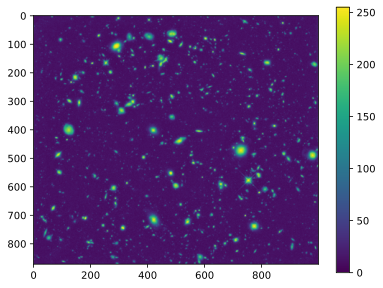

In [11]:
import matplotlib.pyplot as plt
plt.imshow(hubble[:,:,0])
plt.colorbar();

To change colormaps, input the name of a different colormap as a string in the optional `cmap` argument (e.g., `plt.imshow(hubble[:,:,0], cmap='magma')`). See [https://matplotlib.org/examples/color/colormaps_reference.html](https://matplotlib.org/examples/color/colormaps_reference.html) for a list of available colormaps. It is strongly encouraged to use one of the *perceptually uniform* colormaps because they are more accurately interpreted by humans and also show up as a smooth, interpretable gradient when printed on a black-and-white printer. Below is the display of the Hubble image red channel using the `Reds` colormap.

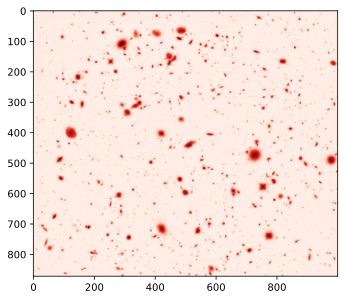

In [12]:
plt.imshow(hubble[:,:,0], cmap='Reds');

````{margin}
```{Tip}
To reverse the direction of any matplotlib colormap, include an `_r` after the colormap name. For example, in the above example with the `Reds` colormap, the larger the value, the more red the pixel representing the value becomes. If you use `Reds_r`, the larger the value, the *less* red the pixel representing the value becomes. 
```
````

```{index} single: images; saving
```
```{index} saving images
```
(7.1.5)=
### 7.1.5 Saving Images

After processing an image, it is sometimes helpful to save the image to disk for records, reports, and presentations. Being that the images are ndarrays, the `plt.savefig()` function works just fine if executed in the same Jupyter cell as the `io.imshow()` function. Alternatively, scikit-image provides an image saving function `io.imsave(file_name, array)` that operates similarly as `plt.savefig()` except with a couple image-specific arguments. One key difference is that `plt.savefig()` does not take an array argument but instead assumes you want the recently displayed image saved while `io.imsave(file_name, array)` takes an array and can save an image even if it has not been displayed in the Jupyter notebook. Check the directory containing the Jupyter notebook, and there should be a new file titled *new_image.png*.

In [13]:
io.imsave('new_img.png', hubble)

(7.2)=
## 7.2 Basic Image Manipulation

The scikit-image library along with NumPy also provide a variety of basic image manipulation functions such as adjusting the color, managing how the data is numerically represented, and establishing threshold cutoff values.

(7.2.1)=
### 7.2.1 Colors

There are numerous ways to represent colors in digital data. The RGB color space is undoubtedly one of the most popular color spaces, but there are others that you may encounter such as HSV (hue, saturation, value) or XYZ. Scikit-image provides functions in the `color` module for easily converting between these color spaces, and Table 2 lists some common functions. See the [scikit-image website](https://scikit-image.org/) for a more complete list.

**Table 2** Common Functions from the `color` Module

| Function | Description |
|:------:  | :--------   |
|`color.rgb2gray()`| Coverts from RGB to grayscale |
|`color.gray2rgb()`| Coverts grayscale to RGB; by just replicating the gray values into three color channels |
|`color.hsv2rbg()`| HSV to RGB conversion |
|`color.xyz2rgb()`| XYZ to RGB conversion |


In [14]:
hubble_gray = color.rgb2gray(hubble)
hubble_gray

array([[0.03326941, 0.04029412, 0.02098392, ..., 0.04727412, 0.0694651 ,
        0.04225137],
       [0.0213051 , 0.03700627, 0.06894431, ..., 0.03863529, 0.06444235,
        0.04005686],
       [0.05296039, 0.06529059, 0.08322392, ..., 0.00644431, 0.05657647,
        0.04877098],
       ...,
       [0.07590157, 0.05825804, 0.05098039, ..., 0.01991333, 0.05295255,
        0.03334471],
       [0.04030196, 0.04062235, 0.06502275, ..., 0.03167804, 0.04149333,
        0.04484941],
       [0.06578078, 0.04454392, 0.06813373, ..., 0.05520745, 0.06224   ,
        0.0597251 ]], shape=(872, 1000))

You will notice that scikit-image takes a three-dimensional data structure, the third dimension being the color channels, and converted it to a two-dimensional, grayscale structure as expected. One detail that may strike you as different is that the values are decimals. Up to this point, grayscale images were represented as two-dimensional arrays of integers from 0 $\rightarrow$ 255. There is no rule that says lightness and darkness values need to be represented as integers. Above, they are presented as floats from 0 $\rightarrow$ 1. This brings us to the next topic of encoding values.

```{index} single: images; encoding
```
(7.2.2)=
### 7.2.2 Encoding

*Encoding* is how the values are presented in the image array. The two most common are integers from 0 $\rightarrow$ 255 or floats from 0 $\rightarrow$ 1. However, there are other ranges outlined in Table 3. Though you may have never encounter some, it is good to be aware that they exist in case you need to deal with them. The difference between signed integers (`int`) and unsigned integers (`uint`) is that unsigned integers are only positive integers starting with zero while signed integers are both positive and negative centered approximately around zero. The approximate part is because there are equal numbers of positive and negative integers, and being that zero is a positive integer, zero is not the exact center. To determine what the range of values is for an image, scikit-image provides the function `skimage.dtype.limits()`.

Scikit-image also provides some convenient functions for converting to various value ranges described in Table 3. These functions are not contained in a module, so you will need to just do an `import skimage` to get access to them, which was done at the start of this chapter. The one format that probably needs commenting on is the Boolean format. In this encoding, every pixel is a `True` or `False` value, which is equivalent to saying `1` or `0`. This is for black-and-white images where each pixel is one of two possible values.

**Table 3** Scikit-Image Functions for Converting Data Types

| Functions | Description |
|:--------: | :---------  |
|`skimage.img_as_ubyte()` | Converts to integers from 0 $\rightarrow$ 255 |
|`skimage.img_as_uint()`  | Converts to integers from 0 $\rightarrow$ 65535 |
|`skimage.img_as_int()`   | Converts to integers from -32768 $\rightarrow$ 32767 |
|`akimage.img_as_bool()`  | Converts to boolean (i.e., `True` or `False`) format |
|`skimage.img_as_float32()` | Converts to floats from 0 $\rightarrow$ 1 with 32-bit precision | 
|`skimage.img_as_float64()` or `img_as_float` | Converts to floats from 0 $\rightarrow$ 1 with 64-bit precision |


In [15]:
skimage.dtype_limits(hubble_gray)

(-1, 1)

In [16]:
hubble_gray_unint8 = skimage.img_as_ubyte(hubble_gray)
skimage.dtype_limits(hubble_gray_unint8)

(0, 255)

```{index} single: images; contrast
```
(7.2.3)=
### 7.2.3 Image Contrast

Before trying to extract certain types of information or identify features in an image, it is sometimes helpful to first increase the contrast of an image. There are a number of ways of doing this including thresholding and modification of the image histogram. Some approaches can be performed using NumPy array manipulation, but scikit-image also provides convenient functions designed for these task.

*Thresholding* can be used to generate a black-and-white image (i.e., not grayscale) by converting gray values at or below a brightness threshold to black and above the threshold to white. The threshold can be set manually or by an algorithm that chooses an optimal value customized to each image. We will start with manually setting a threshold. The grayscale image generated from `rgb2gray()` is encoded with floats from 0 $\rightarrow$ 1, so a threshold of 0.65 is chosen using trial-and-error. A black-and-white image is then generated as a Boolean. The resulting black-and-white image is shown below.

/var/folders/zy/7y6kpdbx6p1ffrp1vtxy3ttc0000gn/T/ipykernel_1698/5758897.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(chem_gray);


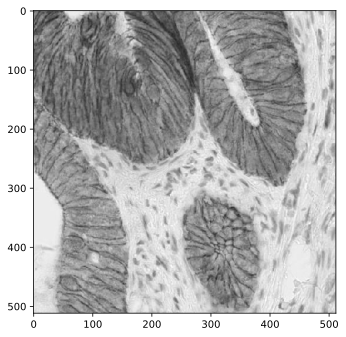

In [17]:
chem = data.immunohistochemistry()
chem_gray = color.rgb2gray(chem)
io.imshow(chem_gray);

/var/folders/zy/7y6kpdbx6p1ffrp1vtxy3ttc0000gn/T/ipykernel_1698/3375097781.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(chem_bw);


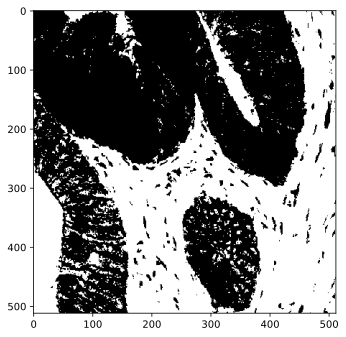

In [18]:
chem_bw = skimage.img_as_ubyte(chem_gray > 0.65)
# above generates a boolean encoding
io.imshow(chem_bw);

The appropriate threshold may vary from image to image, so manually setting a value is sometimes not practical. Scikit-image provides a number of functions, shown below in Table 4, in the filters module for automatically choosing a threshold. If you are not sure which of the functions below to use, there is a `try_all_filters()` function in the filters module that will try seven of them and plot the results for easy comparison.

**Table 4** Threshold Functions from the `filters` Module

| Functions | Description* |
|:--------:  | :----------|
|`filters.threshold_isodata()` | Threshold value from ISODATA method |
|`filters.threshold_li()` | Threshold value from Li’s minimum cross entropy method |
|`filters.threshold_local()` | Threshold mask (array) from local neighborhoods |
|`filters.threshold_mean()` | Threshold value from mean grayscale value |
|`filters.threshold_minimum()` | Threshold value from minimum method |
|`filters.threshold_niblack()` | Threshold mask (array) from the Niblack method |
|`filters.threshold_otsu()` | Threshold value from Otsu’s method |
|`filters.threshold_sauvola()` | Threshold mask (array) from Sauvola method |
|`filters.threshold_triangle()` | Threshold value from triangle method |
|`filters.threshold_yen()` | Threshold value from Yen method |

*Threshold value functions provides a single threshold value while threshold masks provides arrays of values the size of the image. They are used in the same fashion except that the latter provides a per-pixel threshold.

Below, we can see the Otsu filter being demonstrated.

/var/folders/zy/7y6kpdbx6p1ffrp1vtxy3ttc0000gn/T/ipykernel_1698/3846250055.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(chem_otsu);


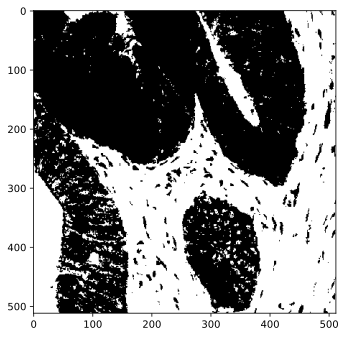

In [19]:
from skimage import filters
threshold = filters.threshold_otsu(chem_gray)
chem_otsu = skimage.img_as_ubyte(chem_gray > threshold)
io.imshow(chem_otsu);

Another method for increasing contrast is by modifying the image histogram. If the values from an image are plotted in a histogram, you will see something that looks like the following.

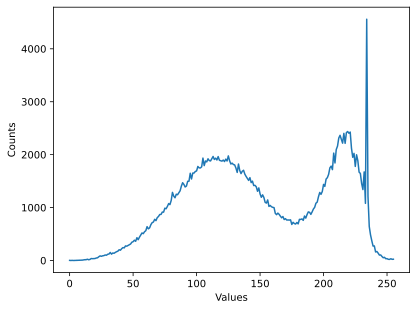

In [20]:
from skimage import exposure
hist = exposure.histogram(chem_gray)
plt.plot(hist[0])
plt.xlabel('Values')
plt.ylabel('Counts');

This is a plot of how many of each type of brightness value is present in the image. There are practically no pixels in the image that are black (value 0) or completely white (value 255), but there are two main collections of gray values. The contrast of this image can be increased by performing histogram equalization, which spreads these values out more evenly. The `exposure` module provides an `equalize_hist()` function for this task.

/var/folders/zy/7y6kpdbx6p1ffrp1vtxy3ttc0000gn/T/ipykernel_1698/1378964753.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(chem_eq);


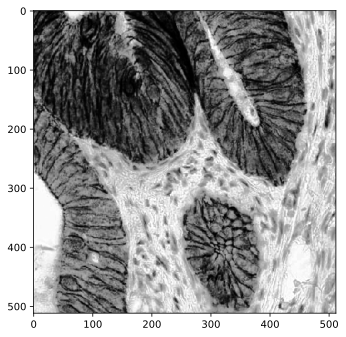

In [21]:
chem_eq = exposure.equalize_hist(chem_gray)
io.imshow(chem_eq);

Histogram equalization does not produce a black-and-white image, but it does make the dark values darker and the light values lighter. If we look at the histogram for this image, it will be more even as shown below.

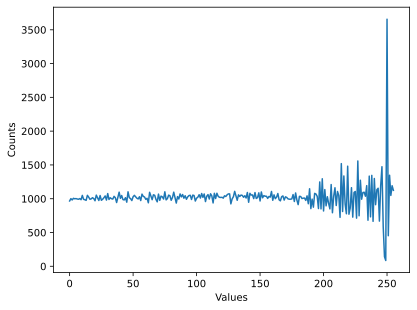

In [22]:
hist = exposure.histogram(chem_eq)
plt.plot(hist[0])
plt.xlabel('Values')
plt.ylabel('Counts');

(7.3)=
## 7.3 Scikit-Image Examples

The scikit-image library contains numerous functions for performing various scientific analyses... so many that they cannot be comprehensively covered here. Below is a selection of some interesting examples that are relevant to science including counting objects in images, entropy analysis, and measuring eccentricity of objects. The examples below use mostly synthetic data to represent various data you might encounter in the lab. Real data can be easily extracted from publications but are not used here for copyright reasons.

```{index} single: images; blob detection
```
(7.3.1)=
### 7.3.1 Blob Detection

A classic problem that translates across many scientific fields is to count spots in a photograph. A biologist may need to quantifying the number of bacteria colonies in a petri dish over the course of an experiment, while an astronomer may want to count the number of stars in a large cluster. In chemistry, this problem may occur as a need to quantify the number of nanoparticles in a photograph or using the locations to calculate the average distances between the particles. 

The good news is that the scikit-image library provides three functions that will take a photograph and return an array of $x$, $y$, $z$ coordinates indicating where the blobs are located in the image. If all you care about is the number of blobs, simply find the length of the returned array. There are three functions listed below which include Laplacian of Gaussian (LoG), Difference of Gaussian (DoG), and Determinant of Hessian (DoH). The LoG algorithm is the most accurate but the slowest while the DoH algorithm is the fastest. These functions only accept two-dimensional images, so if it is a color image, you will need to either convert it to grayscale or select a single color channel to work with.

~~~python
skimage.feature.blob_log(image, threshold=)

skimage.feature.blob_dog(image, threshold=)

skimage.feature.blob_doh(image, threshold=)
~~~

/var/folders/zy/7y6kpdbx6p1ffrp1vtxy3ttc0000gn/T/ipykernel_1698/4244484902.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(dots);


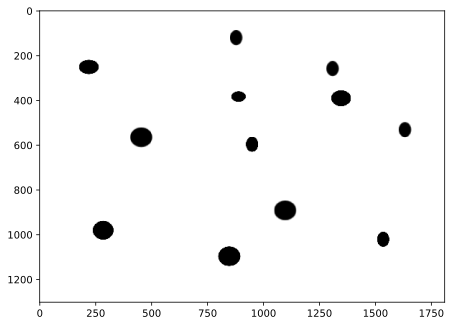

In [23]:
dots = io.imread('data/dots.png')
io.imshow(dots);

An image of black dots on a white background is imported above, but the blob detection algorithms work best with light colors on a dark background. We will invert the image below by subtracting the values from the maximum value or using the `color.rgb2gray()`.

~~~python
dots_inverted = color.rgb2gray(255 - dots)
~~~
or
~~~python
dots_inverted = skimage.util.invert(dots)
~~~

/var/folders/zy/7y6kpdbx6p1ffrp1vtxy3ttc0000gn/T/ipykernel_1698/1622494045.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(dots_inverted);


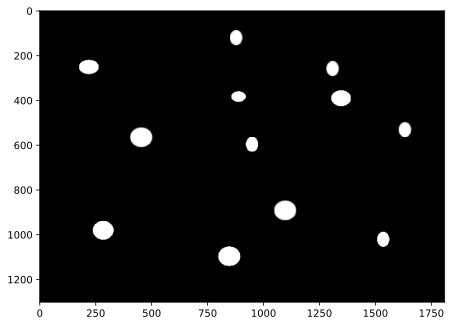

In [24]:
dots_inverted = color.rgb2gray(255 - dots)
io.imshow(dots_inverted);

To detect the blobs, we will use the `blob_dog()` function as demonstrated below. The function allows for a `threshold` argument to be set to adjust the sensitivity of the algorithm in finding blobs. A lower threshold results in smaller or less intense blobs included in the returned array.

In [25]:
from skimage import feature
blobs = feature.blob_dog(dots_inverted, threshold=0.5)
blobs

array([[1096.       ,  847.       ,   26.8435456],
       [ 565.       ,  453.       ,   26.8435456],
       [ 892.       , 1097.       ,   26.8435456],
       [ 980.       ,  283.       ,   26.8435456],
       [1021.       , 1534.       ,   16.777216 ],
       [ 596.       ,  949.       ,   16.777216 ],
       [ 531.       , 1632.       ,   16.777216 ],
       [ 120.       ,  877.       ,   16.777216 ],
       [ 258.       , 1308.       ,   16.777216 ],
       [ 383.       ,  888.       ,   16.777216 ],
       [ 391.       , 1346.       ,   26.8435456],
       [ 251.       ,  219.       ,   26.8435456]])

The returned array includes three columns corresponding to the $y$ position, $x$ position, and intensity of each spot, respectively. The $x$ and $y$ coordinates for an image starts at the top left corner while typical plots start at the bottom left. Keep this in mind when comparing the coordinates to the image. To confirm that scikit-image found all the blobs, we can plot the coordinates on top of the image to see that they all line up. This is demonstrated below.

/var/folders/zy/7y6kpdbx6p1ffrp1vtxy3ttc0000gn/T/ipykernel_1698/1109010740.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(dots_inverted)


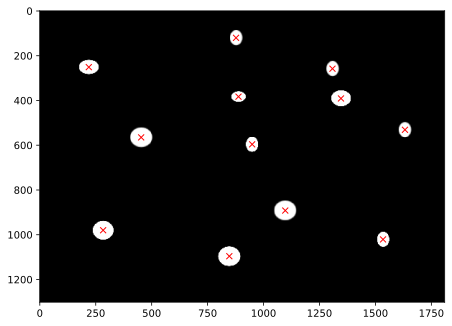

In [26]:
io.imshow(dots_inverted)
plt.plot(blobs[:,1], blobs[:,0], 'rx');

To find the number of spots, determine length of the array using the `len()` Pythong function or using .

In [27]:
len(blobs)

12

```{index} single: images; entropy
```
(7.3.2)=
### 7.3.2 Entropy Analysis

The term *entropy* outside of the physical sciences is used to represent a quantification of disorder or irregularity. In image analysis, this disorder is the amount of pixel (brightness or color) variation within a region of the image. As you will see below, entropy is the highest near the boundaries and in noisy areas of a photograph. This makes an entropy analysis useful for edge detection, checking for image quality, and detecting alterations to an image. 

The `filters.rank` modules contains the entropy function shown below. It works by going through the image pixel-by-pixel and calculating the entropy in the neighborhood. The *neighborhood* is the area around each pixel. An entropy value is recorded in the new array at each location and can be plotted to generate an entropy map. The entropy function takes two required arguments: the image (`img`) and a description of the neighborhood called a *structured element* (`selem`).

~~~python
filters.rank.entropy(img, selem)
~~~

In [28]:
from skimage.morphology import disk
from skimage.filters.rank import entropy
selem = disk(5)
selem

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=uint8)

The neighborhood is defined as an array of ones and zeros. In this case, it is a disk of radius 5. The user can adjust this value to the needs of the analysis.

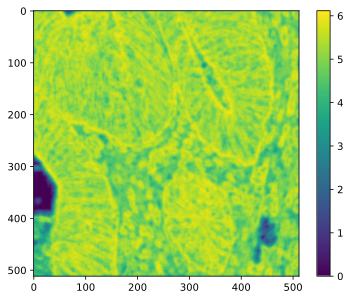

In [29]:
chem_gray_int = skimage.util.img_as_ubyte(chem_gray) #convert img to int
S = entropy(chem_gray_int, selem)
plt.imshow(S)
plt.colorbar();

````{margin}
```{note}
The step above for converting the image repesentation from floats to integers is not strictly required, but the `entropy()` function will generate a loss of precision warning if you do not.
```
````

Examination of the image shows that there is an increase in entropy near the edges of the features in the image as expected. There are two regions (blue) that contain unusually low entropy. If you look back at the original image, these regions are comparatively homogeneous in color.

```{index} single: images; eccentricity
```
(7.3.3)=
### 7.3.3 Eccentricity

*Eccentricity* is the measurement of how non-circular an object is. It runs from 0 $\rightarrow$ 1 with zero being a perfect circle and large values representing more eccentric objects. This can be useful for quantifying the shape of nanoparticles or droplets of liquid. The `measure` module from scikit-image provides an easy method of measuring eccentricity. First, let us first import an image of ovals for an example. Alternatively, you are welcome to use the `coins` image from the `data` module, but this will require some preprocessing such as increasing the contrast.

/var/folders/zy/7y6kpdbx6p1ffrp1vtxy3ttc0000gn/T/ipykernel_1698/3848032356.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(ovals);


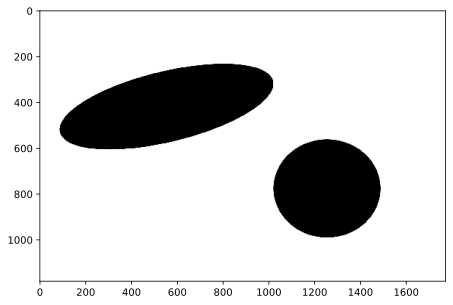

In [30]:
ovals = io.imread('data/ovals.png')
io.imshow(ovals);

The main function for measuring eccentricity is the `regionsprops()` function, but this function by itself cannot find the objects. Luckily, there is another function in the `measure` module called `label()` that will do exactly this, and this function requires the regions to be light with dark backgrounds. The following inverts the light and dark and also truncates the alpha channel from the RGBA image.

/var/folders/zy/7y6kpdbx6p1ffrp1vtxy3ttc0000gn/T/ipykernel_1698/2349859309.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(ovals_invert);


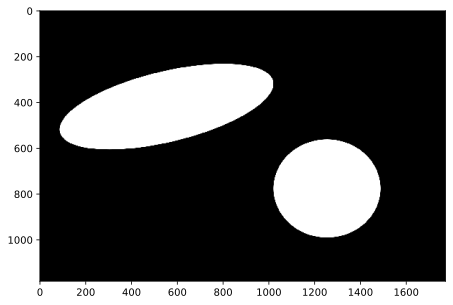

In [31]:
ovals_invert = color.rgb2gray(255 - ovals[:,:,:-1])
io.imshow(ovals_invert);

The `regionsprops()` function returns the properties on the two ovals in a list of lists. The first list corresponds to the first object and so on. Each list contains an extensive collection of properties, so it is worth visiting the scikit-image website to see the complete documentation. We are only concerned with eccentricity right now, so we can access the eccentricity of the first object with `props[0].eccentricity`, which gives a value of about 0.95 for the first object while the second object has a much lower values of about 0.40. This makes sense being that the first object is very eccentric while the second object is much more circular.

In [32]:
from skimage.measure import label, regionprops
lbl = label(ovals_invert)
props = regionprops(lbl)

In [33]:
props[0].eccentricity

0.9469273936534165

In [34]:
props[1].eccentricity

0.39666071911272044

## Further Reading

The scikit-image library with NumPy are likely all you will need for a vast majority of your scientific image processing, and the scikit-image project webpage is an excellent course of information and examples. The gallery page is particularly worth checking out as it provides a large number of examples highlighting the library's capabilities. In the event there is an edge case the scikit-image cannot do, the pillow library may be of some use. Pillow provides more fundamental image processing functionality such as extracting metadata from the original file.

1. Scikit-image Website. [http://scikit-image.org/](http://scikit-image.org/) (free resource)

2. Pillow Documentation Page. [https://pillow.readthedocs.io/en/stable/](https://pillow.readthedocs.io/en/stable/) (free resource)

3. Tanimoto, S. L. *An Interdisciplinary Introduction to Image Processing: Pixels, Numbers, and Programs* MIT Press: Cambridge, MA, 2012.

## Exercises

Complete the following exercises in a Jupyter notebook. Any data file(s) refered to in the problems can be found in the [data](https://github.com/weisscharlesj/SciCompforChemists/tree/master/notebooks) folder in the same directory as this chapter's Jupyter notebook. Alternatively, you can download a zip file of the data for this chapter from [here](https://github.com/weisscharlesj/data_SciCompforChem) by selecting the appropriate chapter file and then clicking the **Download** button.

1. Import the image titled **NaK_THF.jpg** using scikit-image.

    a) Convert the image to grayscale using a scikit-image function. 
    
    b) Save the grayscale image using the `io` module.
    
2. Load the **chelsea** image from the scikit-image `data` module and convert it to grayscale. Display the image using the scikit-image plotting function and display it a second time using a matplotlib plotting function. Why do they look different?

3. Generate a 100 $\times$ 100 pixel image containing random noise generated by a method from the `np.random` module such as `random()` or `integers()` (see [section 4.7](4.7)). Display the image in a Jupyter notebook along with a histogram of the pixel values. Hint: you will need to [flatten](4.2.2) the array before generating the histogram plot.

4. Write your own Python function for converting a color image to grayscale. Then find the source code for the scikit-image `rgb2gray()` function available on the scikit- image website and compare it to your own function. Are there any major differences between your function and the scikit-image function?

5. Import an image of your choice either from the data module or of your own and convert it to a grayscale image.

    a) Invert the grayscale image using NumPy by subtracting all values from the maximum possible value
    
    b) Invert the original grayscale image using the `invert()` function in the scikit- image `util` module

6. Import a color image of your choice either from the `data` module or of your own and calculate the sum of all pixels from each of the three color channels (RGB). Which color (red, green, or blue) is most prevalent in your image?

7. The folder titled **glow_stick** contains a series of images taken of a glow stick over the course of approximately thirteen hours along with a CSV file containing the times at which each image was taken in numerical order. Quantify the brightness of each image and generate a plot of brightness versus time.

8. The JPG image file format commonly used for photographs degrades images during the saving process due to the lossy compression algorithm while the PNG image file format does not degrade images with its lossless compression algorithm.

    a) To view how JPG distorts images, import the **nmr.png** and **nmr.jpg** images of the same NMR spectrum.         Subtract the two images from each other and visualize this difference to see the image distortions caused by JPG     compression.
    
    b) Which of the above file formats is better for image-based data in terms of data integrity?

9. Import the image **spots.png** and determine the number of spots in the image using scikit-image. Plot the coordinates of the spots you find with red x’s over the image to confirm your results. If your script missed any spots, speculate as to why those spots were missed.

10. The image **test_tube_altered.png** has been altered using photo editing software. Generate and plot an entropy map of the image to identify the altered regions.

11. Steganography is the practice of hiding information in an image or digital file to avoid detection. The file **hidden_img.png** was created by combining an image with pseudorandom noise to mask the original image. Perform an entropy analysis on the image to reveal the original image. You may need to adjust the size of the selection element (`selem`) to detect the hidden image.